In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터호출

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
train.shape

(10886, 12)

In [6]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
train['datetime']=pd.to_datetime(train['datetime'])
test['datetime']=pd.to_datetime(test['datetime'])

In [8]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

# 데이터 EDA

In [9]:
test['year']=test['datetime'].dt.year
test['month']=test['datetime'].dt.month
test['dayofweek'] = test['datetime'].dt.dayofweek
test['day']=test['datetime'].dt.day
test['hour']=test['datetime'].dt.hour

In [10]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['dayofweek'] = train['datetime'].dt.dayofweek
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour

In [11]:
train['season'].unique()

array([1, 2, 3, 4], dtype=int64)

Text(0.5, 1.0, '계절별 대여량 비교')

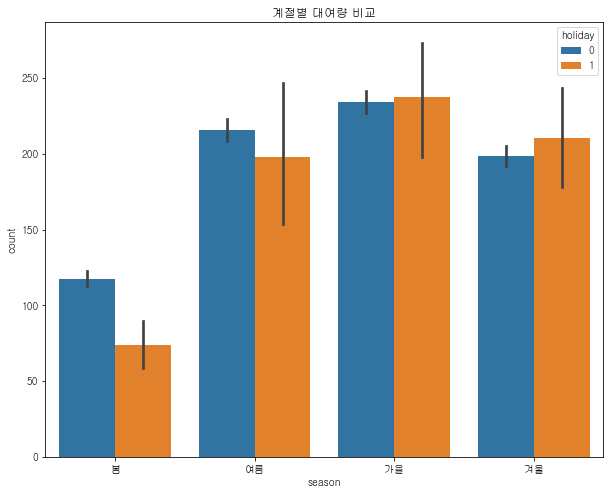

In [12]:
ax=plt.figure(figsize=(10,8))
sn.barplot(x='season',y='count',data=train,hue='holiday')
plt.xticks([0,1,2,3],['봄','여름','가을','겨울'])
plt.title('계절별 대여량 비교')

In [13]:
train['temp']=round(train['temp'])
train['temp']

0        10.0
1         9.0
2         9.0
3        10.0
4        10.0
         ... 
10881    16.0
10882    15.0
10883    14.0
10884    14.0
10885    13.0
Name: temp, Length: 10886, dtype: float64

In [14]:
train['atemp']=round(train['atemp'])

In [15]:
test['temp']=round(test['temp'])
test['atemp']=round(test['atemp'])

In [16]:
train['windspeed']=round(train['windspeed'])
test['windspeed']=round(test['windspeed'])

Text(0.5, 1.0, '공휴일과 그외의 날 대여 빈도 비교')

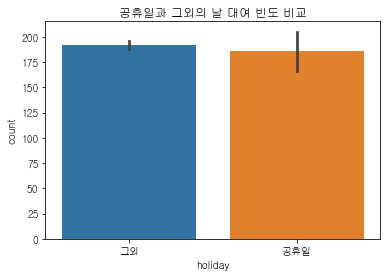

In [17]:
sn.barplot(x='holiday',y='count',data=train)
plt.xticks([0,1],['그외','공휴일'])
plt.title("공휴일과 그외의 날 대여 빈도 비교")

Text(0.5, 1.0, '일하는날과 그외의 날 대여 빈도 비교')

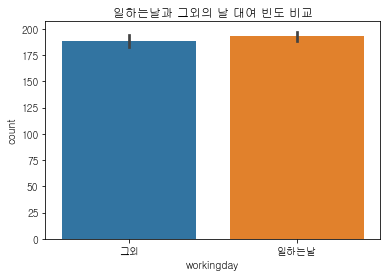

In [18]:
sn.barplot(x='workingday',y='count',data=train)
plt.xticks([0,1],['그외','일하는날'])
plt.title("일하는날과 그외의 날 대여 빈도 비교")

공휴일과 일하는 날의 그래프를 비교해보니 공휴일이아닌날=일하는날로 판정되어 하나의 컬럼만 사용한다

Text(0.5, 1.0, '월별 대여량지수')

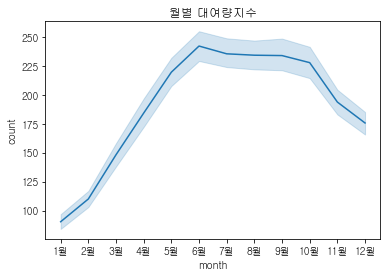

In [19]:
sn.lineplot(x='month',y='count',data=train)
plt.xticks(range(1,13),['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'])
plt.title("월별 대여량지수")


날씨가 자전거 타기 좋은 5월부터10월까지 자전거를 많이 빌릴 사람들이 많다

Text(0.5, 1.0, '날씨별 대여량 비교')

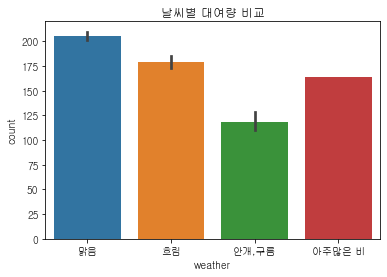

In [20]:
sn.barplot(x='weather',y='count',data=train)
plt.xticks([0,1,2,3],['맑음','흐림','안개,구름','아주많은 비'])
plt.title('날씨별 대여량 비교')

날씨가 화창한 날에 많이 빌린다고 말할수 있다
이주많은 비의 날씨에 사람들이 많이 빌린이유는?

Text(0.5, 1.0, '시간대별 일하는날과 아닌날의 대여량비교')

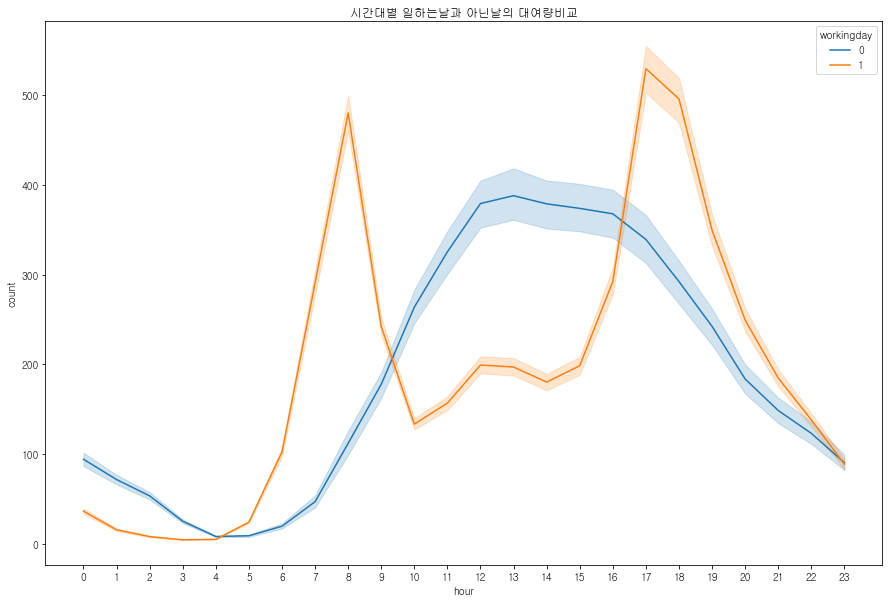

In [21]:
plt.figure(figsize=(15,10))
sn.lineplot(x='hour',y='count',data=train,hue='workingday')
plt.xticks(range(0,24),range(0,24))
plt.title('시간대별 일하는날과 아닌날의 대여량비교')

출근시간에 사람들이 많이 빌린다고 볼 수 있다

Text(0.5, 1.0, '시간대별 대여량차이')

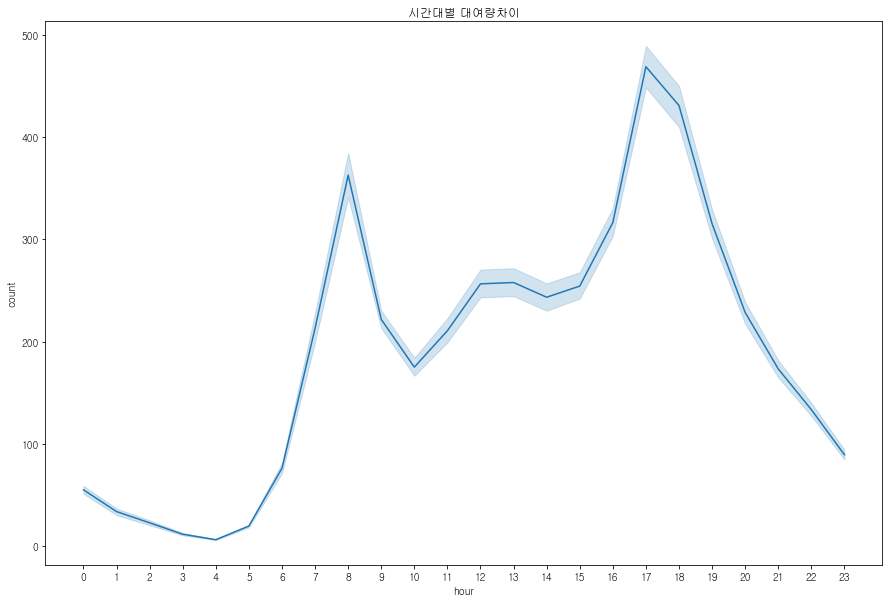

In [22]:
plt.figure(figsize=(15,10))
sn.lineplot(x='hour',y='count',data=train)
plt.xticks(range(0,24),range(0,24))
plt.title('시간대별 대여량차이')

위 그래프를 보아 출퇴근시간대에 자전거를 많이 빌린다고 할 수 있다

Text(0.5, 1.0, '계절별 일하는날과 아닌날의 비교')

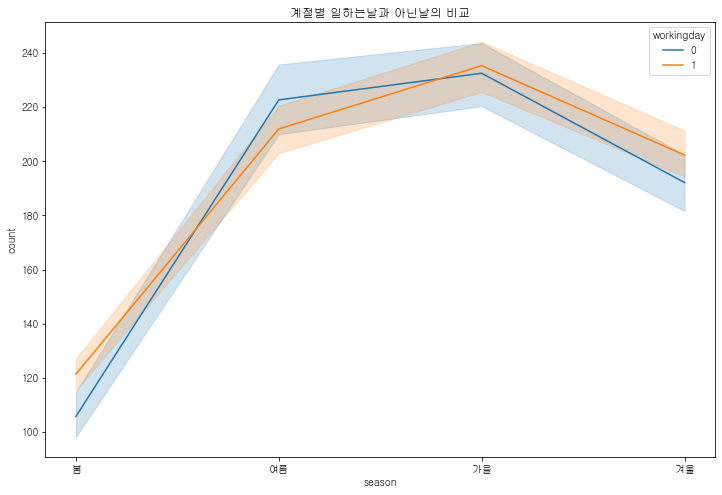

In [23]:
plt.figure(figsize=(12,8))
sn.lineplot(x='season',y='count',data=train,hue='workingday')
plt.xticks([1,2,3,4],['봄','여름','가을','겨울'])
plt.title('계절별 일하는날과 아닌날의 비교')

Text(0.5, 1.0, '요일별 시간대 대여 갯수 그래프')

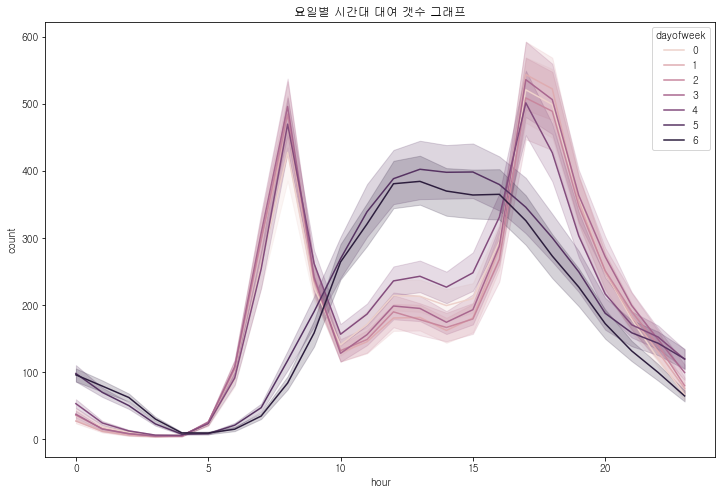

In [24]:
plt.figure(figsize=(12,8))
sn.lineplot(x='hour',y='count',data=train,hue='dayofweek',color='blue')

plt.title('요일별 시간대 대여 갯수 그래프')

In [25]:
a=sum(train['casual'])
b=sum(train['registered'])

Text(0.5, 1.0, '등록과 미등록 차이')

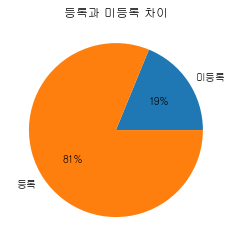

In [26]:
plt.pie(x=[a,b],labels=['미등록','등록'],autopct='%.f%%')
plt
plt.title('등록과 미등록 차이')

Text(0.5, 1.0, '년도비교')

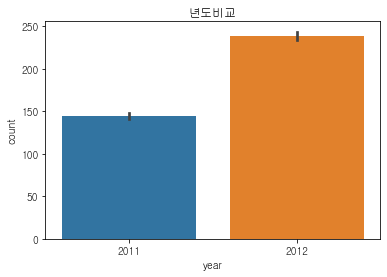

In [27]:
sn.barplot(data=train,x='year',y='count')
plt.title('년도비교')

([<matplotlib.axis.XTick at 0x2cab81617c0>,
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금'),
  Text(5, 0, '토'),
  Text(6, 0, '일')])

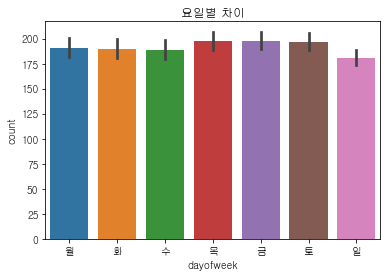

In [28]:
sn.barplot(data=train,x='dayofweek',y='count')
plt.title("요일별 차이")
plt.xticks(range(0,7),['월','화','수','목','금','토','일'])

요일별 총대여량은 차이가 없다를 의미한다


In [29]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
dayofweek              int64
day                    int64
hour                   int64
dtype: object

In [30]:
train=train.astype({'datetime':'object'})

<AxesSubplot:>

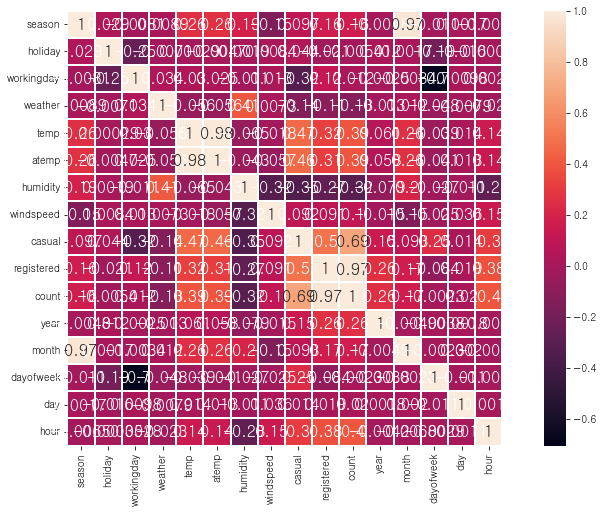

In [31]:
plt.figure(figsize=(15,8))
sn.heatmap(train.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [32]:
x=train.drop(['count','datetime'],axis=1)
y=train['count']

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']=x.columns
vif=vif.sort_values("VIF FACTOR").reset_index(drop=True)
vif

,VIF FACTOR,Features
0,1.567483,holiday
1,3.397394,casual
2,3.426360,registered
3,4.151191,windspeed
4,4.339763,day
5,4.722823,hour
6,7.527820,weather
7,9.191196,dayofweek
8,10.085406,workingday
9,19.484371,humidity


In [34]:
train['season']=train.season.map({1:'봄',2:'여름',3:'가을',4:'겨울'})
train['weather']=train.weather.map({1:'맑음',2:'구름안개',3:'적은눈,비',4:'많은 비,눈'})

In [35]:
test['season']=test.season.map({1:'봄',2:'여름',3:'가을',4:'겨울'})
test['weather']=test.weather.map({1:'맑음',2:'구름안개',3:'적은눈,비',4:'많은 비,눈'})

날씨와 계절은 비교대상이 아니기 때문에 0,1,2로 두는것이 어렵다고 판단하여 다시 원글씨로 변환

In [36]:
x=train.drop(['count','datetime'],axis=1)
y=train['count']

In [37]:
x.dtypes

season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
year            int64
month           int64
dayofweek       int64
day             int64
hour            int64
dtype: object

In [38]:
x1=pd.get_dummies(train['season'])
x2=pd.get_dummies(train['weather'])
data1=pd.concat([train,x1],axis=1)
data2=pd.concat([data1,x2],axis=1)

In [39]:
e_data=data2.drop(['season','weather'],axis=1)

In [40]:
e_data

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,day,hour,가을,겨울,봄,여름,구름안개,"많은 비,눈",맑음,"적은눈,비"
0,2011-01-01 00:00:00,0,0,10.0,14.0,81,0.0,3,13,16,...,1,0,0,0,1,0,0,0,1,0
1,2011-01-01 01:00:00,0,0,9.0,14.0,80,0.0,8,32,40,...,1,1,0,0,1,0,0,0,1,0
2,2011-01-01 02:00:00,0,0,9.0,14.0,80,0.0,5,27,32,...,1,2,0,0,1,0,0,0,1,0
3,2011-01-01 03:00:00,0,0,10.0,14.0,75,0.0,3,10,13,...,1,3,0,0,1,0,0,0,1,0
4,2011-01-01 04:00:00,0,0,10.0,14.0,75,0.0,0,1,1,...,1,4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,16.0,20.0,50,26.0,7,329,336,...,19,19,0,1,0,0,0,0,1,0
10882,2012-12-19 20:00:00,0,1,15.0,17.0,57,15.0,10,231,241,...,19,20,0,1,0,0,0,0,1,0
10883,2012-12-19 21:00:00,0,1,14.0,16.0,61,15.0,4,164,168,...,19,21,0,1,0,0,0,0,1,0
10884,2012-12-19 22:00:00,0,1,14.0,17.0,61,6.0,12,117,129,...,19,22,0,1,0,0,0,0,1,0


In [41]:
e_data.dtypes

datetime       object
holiday         int64
workingday      int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
dayofweek       int64
day             int64
hour            int64
가을              uint8
겨울              uint8
봄               uint8
여름              uint8
구름안개            uint8
많은 비,눈          uint8
맑음              uint8
적은눈,비           uint8
dtype: object

In [42]:
x=e_data.drop(['count','datetime'],axis=1)
y=e_data['count']

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']=x.columns
vif=vif.sort_values("VIF FACTOR").reset_index(drop=True)
vif

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF FACTOR,Features
0,1.002965,day
1,1.106414,year
2,1.215068,windspeed
3,1.290273,hour
4,1.523229,holiday
5,1.752184,humidity
6,1.782249,registered
7,2.257734,casual
8,2.824025,dayofweek
9,3.228193,workingday


기온과 체감기온이 상대적으로 높게 나와 둘중 하나를 제거하여 실시한다

원핫으로 사용하여 다중공선성을 확인한경우 많은 데이터를 제거해야하므로 원핫을 쓰고 나서 학습한것과 아닌것을 비교

이상치 확인 및 제거

<AxesSubplot:xlabel='humidity', ylabel='count'>

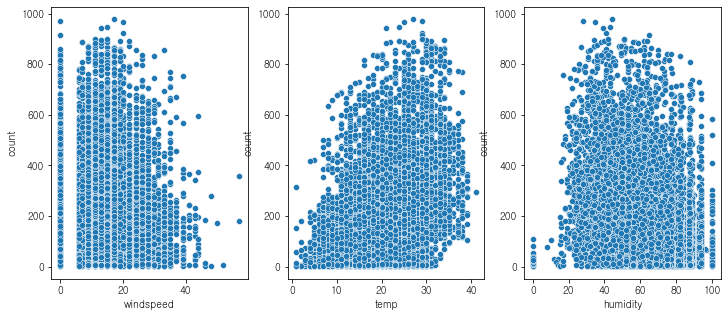

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

sn.scatterplot(data = train, x = 'windspeed', y = 'count', ax = ax1)
sn.scatterplot(data = train, x = 'temp', y = 'count', ax = ax2)
sn.scatterplot(data = train, x = 'humidity', y =  'count', ax = ax3)

In [45]:
len(train[train['windspeed']==0])

1313

바람이 풍속이 0일리는 없어서 이상치 확인 및 제거

<AxesSubplot:xlabel='count'>

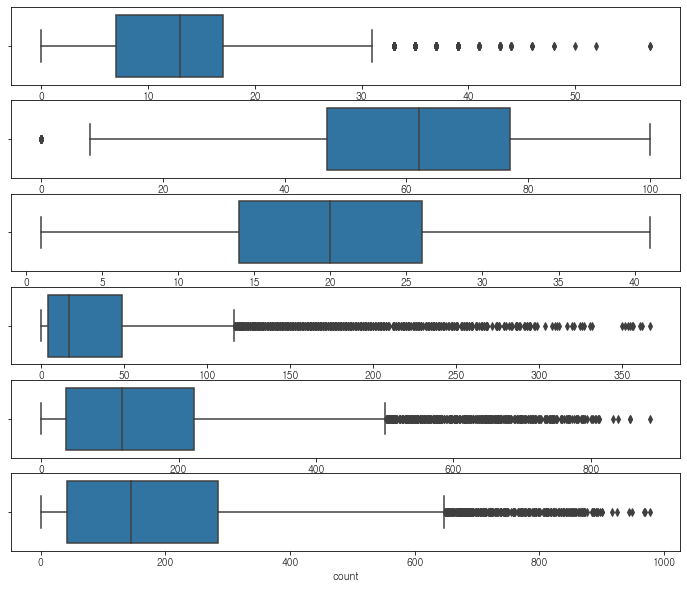

In [46]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (12,10))
sn.boxplot(data = train, x = 'windspeed', ax = ax1)
sn.boxplot(data = train, x = 'humidity', ax = ax2)
sn.boxplot(data = train, x = 'temp', ax = ax3)
sn.boxplot(data = train, x = 'casual', ax = ax4)
sn.boxplot(data = train, x = 'registered', ax = ax5)
sn.boxplot(data = train, x = 'count', ax = ax6)

In [47]:
from collections import Counter

def detect_outliers(data, n, cols):
    outlier_indices=[]
    for col in cols:
        q1=np.percentile(data[col],25)
        q3=np.percentile(data[col],75)
        IQR=q3-q1
        
        outlier_step=1.5*IQR
        outlier_list_col=data[(data[col]<q1-outlier_step) | (data[col]>q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices=Counter(outlier_indices)
    mutiple_outliers=list(k for k,v in outlier_indices.items() if v>n)
    return mutiple_outliers
        
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [48]:
train.shape

(10886, 17)

In [49]:
train1= train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)
train1.shape

(10846, 17)

In [50]:
train.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
dayofweek       int64
day             int64
hour            int64
dtype: object

category 범주화

In [51]:
train1.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
dayofweek       int64
day             int64
hour            int64
dtype: object

In [52]:
test.dtypes

datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
year                   int64
month                  int64
dayofweek              int64
day                    int64
hour                   int64
dtype: object

In [53]:
test['datetime']=test['datetime'].astype({'datetime':'object'})

In [54]:
test.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
year            int64
month           int64
dayofweek       int64
day             int64
hour            int64
dtype: object

In [55]:
data = train1.append(test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)
data

C:\Users\user\AppData\Local\Temp\ipykernel_14652\2492413856.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train1.append(test)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,day,hour
0,2011-01-01 00:00:00,봄,0,0,맑음,10.0,14.0,81,0.0,3.0,13.0,16.0,2011,1,5,1,0
1,2011-01-01 01:00:00,봄,0,0,맑음,9.0,14.0,80,0.0,8.0,32.0,40.0,2011,1,5,1,1
2,2011-01-01 02:00:00,봄,0,0,맑음,9.0,14.0,80,0.0,5.0,27.0,32.0,2011,1,5,1,2
3,2011-01-01 03:00:00,봄,0,0,맑음,10.0,14.0,75,0.0,3.0,10.0,13.0,2011,1,5,1,3
4,2011-01-01 04:00:00,봄,0,0,맑음,10.0,14.0,75,0.0,0.0,1.0,1.0,2011,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,2012-12-31 19:00:00,봄,0,1,구름안개,11.0,13.0,60,11.0,NaN,NaN,NaN,2012,12,0,31,19
17335,2012-12-31 20:00:00,봄,0,1,구름안개,11.0,13.0,60,11.0,NaN,NaN,NaN,2012,12,0,31,20
17336,2012-12-31 21:00:00,봄,0,1,맑음,11.0,13.0,60,11.0,NaN,NaN,NaN,2012,12,0,31,21
17337,2012-12-31 22:00:00,봄,0,1,맑음,11.0,14.0,56,9.0,NaN,NaN,NaN,2012,12,0,31,22


In [56]:
categoricalFeatureNames = ["season","holiday","workingday","weather","dayofweek","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","registered"]

In [57]:
data['season']=data.season.map({'봄':1,'여름':2,'가을':3,'겨울':4})
data['weather']=data.weather.map({'맑음':1,'구름안개':2,'적은눈,비':3,'많은 비,눈':4})

In [58]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_14652\788297929.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataWindNot0.append(dataWind0)


In [59]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,day,hour
0,2011-01-01 05:00:00,1,0,0,2,10.0,13.0,75,6.000000,0.0,1.0,1.0,2011,1,5,1,5
1,2011-01-01 10:00:00,1,0,0,1,16.0,20.0,76,17.000000,12.0,24.0,36.0,2011,1,5,1,10
2,2011-01-01 11:00:00,1,0,0,1,15.0,17.0,81,19.000000,26.0,30.0,56.0,2011,1,5,1,11
3,2011-01-01 12:00:00,1,0,0,1,17.0,21.0,77,19.000000,29.0,55.0,84.0,2011,1,5,1,12
4,2011-01-01 13:00:00,1,0,0,2,19.0,23.0,72,20.000000,47.0,47.0,94.0,2011,1,5,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,2012-12-29 12:00:00,1,0,0,3,8.0,12.0,100,9.816667,NaN,NaN,NaN,2012,12,5,29,12
17335,2012-12-29 13:00:00,1,0,0,3,8.0,12.0,100,9.816667,NaN,NaN,NaN,2012,12,5,29,13
17336,2012-12-29 15:00:00,1,0,0,2,10.0,12.0,87,9.027000,NaN,NaN,NaN,2012,12,5,29,15
17337,2012-12-29 23:00:00,1,0,0,2,11.0,12.0,60,26.857583,NaN,NaN,NaN,2012,12,5,29,23


In [60]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [61]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,day,hour
0,2011-01-01 05:00:00,1,0,0,2,10.0,13.0,75,6.000000,0.0,1.0,1.0,2011,1,5,1,5
1,2011-01-01 10:00:00,1,0,0,1,16.0,20.0,76,17.000000,12.0,24.0,36.0,2011,1,5,1,10
2,2011-01-01 11:00:00,1,0,0,1,15.0,17.0,81,19.000000,26.0,30.0,56.0,2011,1,5,1,11
3,2011-01-01 12:00:00,1,0,0,1,17.0,21.0,77,19.000000,29.0,55.0,84.0,2011,1,5,1,12
4,2011-01-01 13:00:00,1,0,0,2,19.0,23.0,72,20.000000,47.0,47.0,94.0,2011,1,5,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17334,2012-12-29 12:00:00,1,0,0,3,8.0,12.0,100,9.816667,NaN,NaN,NaN,2012,12,5,29,12
17335,2012-12-29 13:00:00,1,0,0,3,8.0,12.0,100,9.816667,NaN,NaN,NaN,2012,12,5,29,13
17336,2012-12-29 15:00:00,1,0,0,2,10.0,12.0,87,9.027000,NaN,NaN,NaN,2012,12,5,29,15
17337,2012-12-29 23:00:00,1,0,0,2,11.0,12.0,60,26.857583,NaN,NaN,NaN,2012,12,5,29,23


In [62]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [63]:
dataTrain

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,day,hour
15161,2011-01-01 00:00:00,1,0,0,1,10.0,14.0,81,6.89000,3.0,13.0,16.0,2011,1,5,1,0
15162,2011-01-01 01:00:00,1,0,0,1,9.0,14.0,80,6.45000,8.0,32.0,40.0,2011,1,5,1,1
15163,2011-01-01 02:00:00,1,0,0,1,9.0,14.0,80,6.45000,5.0,27.0,32.0,2011,1,5,1,2
15164,2011-01-01 03:00:00,1,0,0,1,10.0,14.0,75,6.92125,3.0,10.0,13.0,2011,1,5,1,3
15165,2011-01-01 04:00:00,1,0,0,1,10.0,14.0,75,6.92125,0.0,1.0,1.0,2011,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,2012-12-19 19:00:00,4,0,1,1,16.0,20.0,50,26.00000,7.0,329.0,336.0,2012,12,2,19,19
9531,2012-12-19 20:00:00,4,0,1,1,15.0,17.0,57,15.00000,10.0,231.0,241.0,2012,12,2,19,20
9532,2012-12-19 21:00:00,4,0,1,1,14.0,16.0,61,15.00000,4.0,164.0,168.0,2012,12,2,19,21
9533,2012-12-19 22:00:00,4,0,1,1,14.0,17.0,61,6.00000,12.0,117.0,129.0,2012,12,2,19,22


In [64]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [65]:
dataTrain

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,dayofweek,day,hour
15161,1,0,0,1,10.0,14.0,81,6.89000,2011,1,5,1,0
15162,1,0,0,1,9.0,14.0,80,6.45000,2011,1,5,1,1
15163,1,0,0,1,9.0,14.0,80,6.45000,2011,1,5,1,2
15164,1,0,0,1,10.0,14.0,75,6.92125,2011,1,5,1,3
15165,1,0,0,1,10.0,14.0,75,6.92125,2011,1,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9530,4,0,1,1,16.0,20.0,50,26.00000,2012,12,2,19,19
9531,4,0,1,1,15.0,17.0,57,15.00000,2012,12,2,19,20
9532,4,0,1,1,14.0,16.0,61,15.00000,2012,12,2,19,21
9533,4,0,1,1,14.0,17.0,61,6.00000,2012,12,2,19,22


In [66]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [67]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [68]:
lModel = LinearRegression()


yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9784927375027452


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9784927220474805


ValueError: DataFrame constructor not properly called!

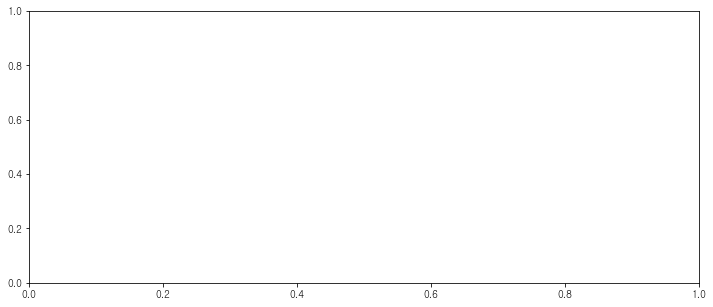

In [80]:
from sklearn.model_selection import GridSearchCV 
ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)


In [82]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10234187843332582


In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.18236042154650728


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

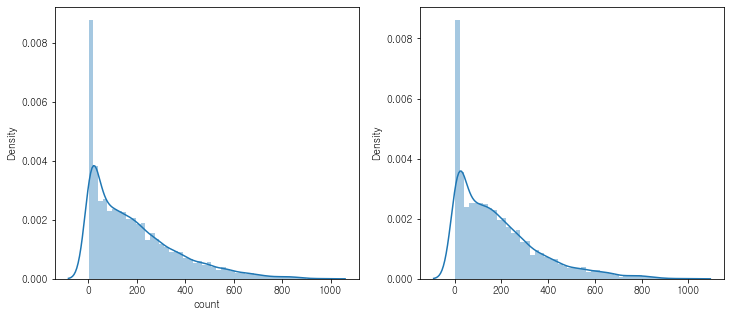

In [84]:
predsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predsTest),ax=ax2,bins=50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

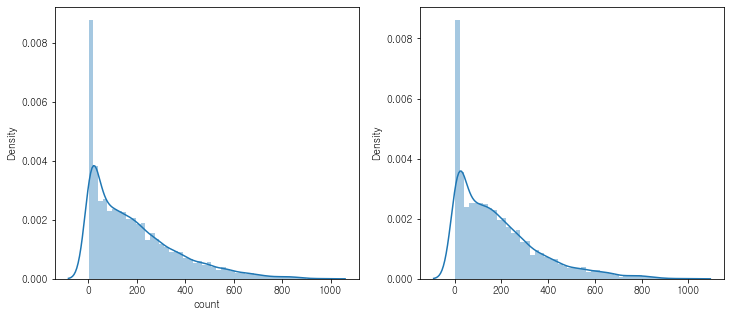

In [86]:
predsTest1 = rfModel.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [87]:
submission1 = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest1)]
    })
submission1.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)